## Binary classification problem
Logistic Regression is for discrete model. Where we have to predict either yes or not. It will not calculate exact value.
It use sigmoate function and final eq. is y = 1 /1+ e^-(m1x1 +m2x2 + .... +c)

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load Titanic Data for analysis

In [110]:
data = pd.read_csv("Titanic.csv");
data.head()

Index(['Name', 'PClass', 'Age', 'Sex', 'Survived'], dtype='object')

## Analysis data

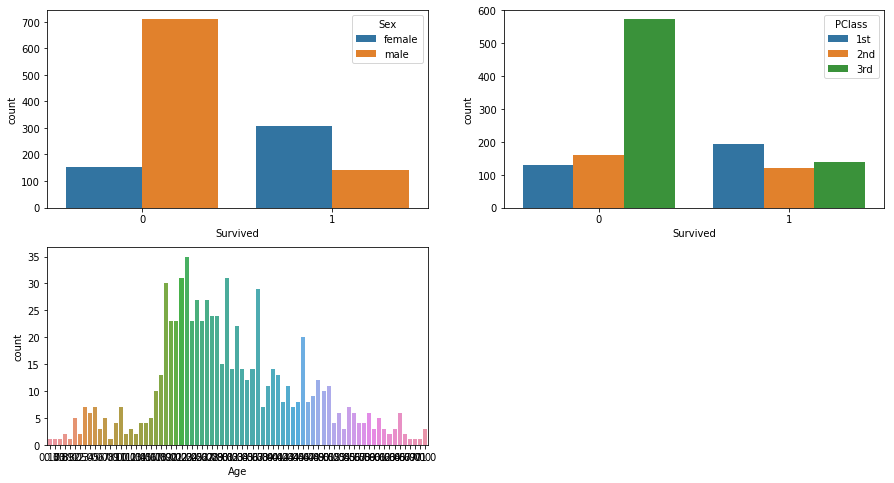

In [4]:
plt.figure(figsize=(15,8));
plt.subplot(221); #(row,col,index)
sns.countplot(x='Survived',data=data,hue='Sex');
plt.subplot(222);
sns.countplot(x='Survived',data=data,hue='PClass');
plt.subplot(223);
sns.countplot(x='Age',data=data);

## Classification without data wrangling
Machine Learning algos need numeric data only. 
Either we need to remove string column or we need to convert them into numeric column. 
Gender and PClass are string columns but required for prediction so we need to convert them into numeric column.

In [5]:
# Logistic regression need numeric data only. 
X = data.loc[:, data.columns != 'Survived'].values;
y = data.loc[:, data.columns == 'Survived'].values;
trainX, testX, trainy, testy = train_test_split(X,y,random_state=5);

#break at this point due to string data
#classifier = LogisticRegression().fit(trainX,trainy);


## Data Wrangling

In [6]:
data.isnull().sum()

Name          0
PClass        1
Age         557
Sex           0
Survived      0
dtype: int64

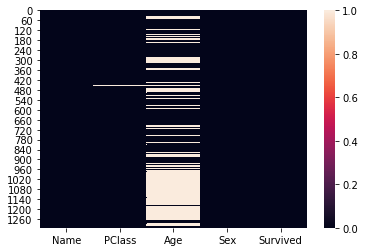

In [7]:
sns.heatmap(data.isnull())

In [8]:
# Replace nan age with mean age
ageCol = data["Age"];
mean = np.mean(ageCol);  #same as np.nanmean(ageCol.values)
ageCol.fillna(mean,inplace=True);
data.shape

(1313, 5)

In [9]:
# remove pClass missing row
# dropna is only at grid level not at column level so this step is always fillna.
data.dropna(inplace=True);
data.shape

(1312, 5)

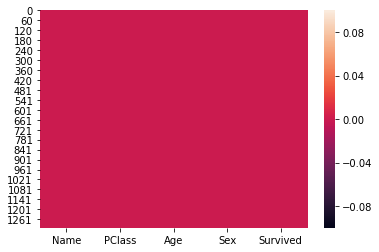

In [10]:
sns.heatmap(data.isnull())

## Converting string value to numeric using pandas

In [11]:
wData = pd.get_dummies(columns=["PClass","Sex"],data=data);
wData.drop(["Name","PClass_1st","Sex_female"], axis= 1,inplace=True);
# data for ML
wData.head()

,Age,Survived,PClass_2nd,PClass_3rd,Sex_male
0,29.00,1,0,0,0
1,2.00,0,0,0,0
2,30.00,0,0,0,1
3,25.00,0,0,0,0
4,0.92,1,0,0,1


## Classifier after Wrangling

In [52]:
X = wData.loc[:, data.columns != 'Survived'].values;
y = np.array(wData['Survived']);
trainX, testX, trainy, testy = train_test_split(X,y,random_state=3);
classifier = LogisticRegression(C=0.01,solver='lbfgs').fit(trainX,trainy);
print("score : {}".format(classifier.score(testX,testy)));
classifier.coef_

score : 0.9786585365853658


array([[-0.01242287,  1.42194681,  0.0221233 , -0.37226845]])

## confusion matrix

[[208   0]
 [  7 113]]


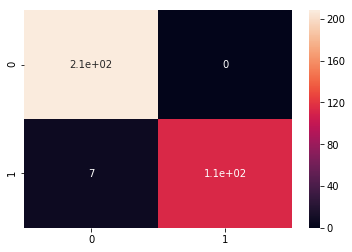

In [13]:
cm = confusion_matrix(testy,classifier.predict(testX));
print(cm);
sns.heatmap(cm,annot=True);

## L2 regularization :- feature weight must be near to 0

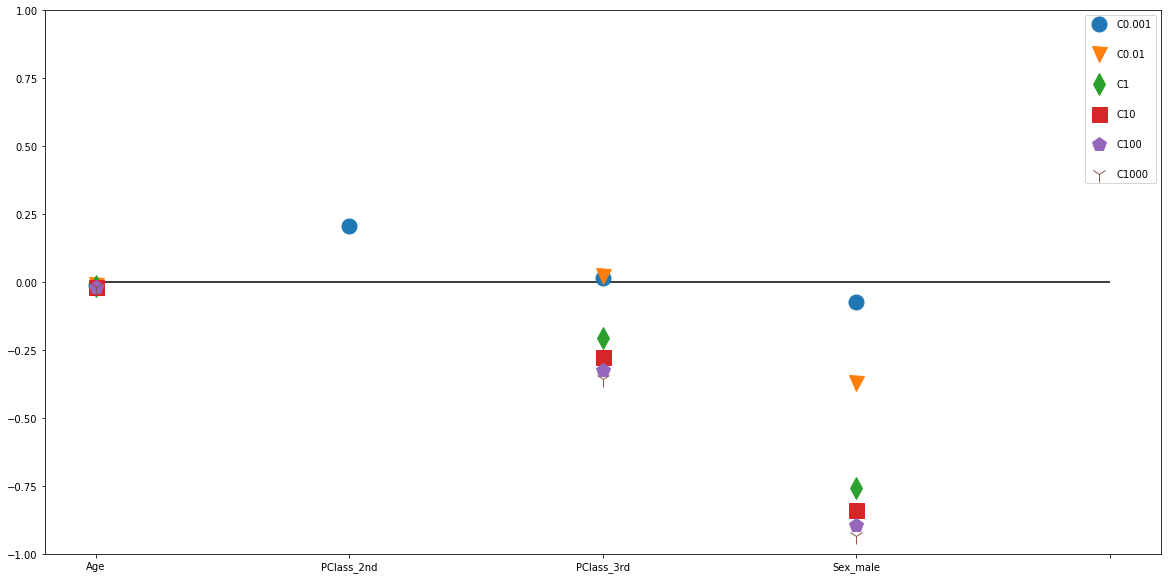

In [180]:
C = [0.001,0.01,1,10,100,1000];
coeff_matrix = [];
error=[];
for c in C:
    classifier = LogisticRegression(C=c,solver="lbfgs").fit(trainX,trainy);
    coeff_matrix.append(classifier.coef_);
    error.append(1- classifier.score(trainX,trainy));
    
symbol = ['o','v','d','s','p','1']
plt.figure(figsize=(20,10));
for y,x,s in zip(coeff_matrix,C,symbol):
    plt.plot(y.T,s,markersize=15,label='C'+str(x));
    
plt.hlines(0,0,4);
    
featureName = list(wData.columns);
featureName.remove('Survived')
plt.xticks(range(wData.columns.size),featureName);
plt.ylim(-1,1);
plt.legend(labelspacing=2);

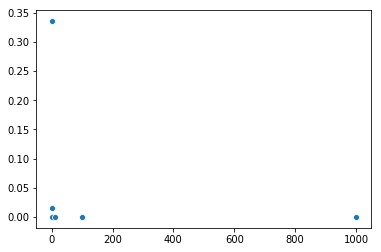

In [182]:
sns.scatterplot(x=C,y=error)